# Objetivo del análisis

Determinar las mejores estrategias de Marketing Emprendedor con promotores que mejor activen los procesos de difusión del mercado.
Validar estadísticamente si existe una diferencia significativa en el WOM sales cuando se aplican las estrategias.

# Descripción de los datos

Los datos fueron tomados de las simulaciones aplicando cada una de las estrategias. Las variables son: WOM_sales, WOM_promoters y num_promoters. Los datos almacenados en las variables fueron tick a tick.

# Creación del entorno

## Cargando paquetes

In [1]:
library(repr)
library("plyr", lib.loc="~/R/win-library/3.2")
library("pgirmess", lib.loc="~/R/win-library/3.2")

Warning message:
: package 'plyr' was built under R version 3.2.5Warning message:
: package 'pgirmess' was built under R version 3.2.5

In [2]:
library(repr)
library("plyr", lib.loc="~/R/win-library/3.3")
# library("nparcomp", lib.loc="~/R/win-library/3.3")
library("pgirmess", lib.loc="~/R/win-library/3.3")

In [3]:
library(repr)
library(plyr)
library(pgirmess)

## Funciones

In [4]:
options(repr.plot.width=5, repr.plot.height=4)

# Cargando los datos

## Non Strategy - Simulaciones WOM sales

In [5]:
St0 <- read.csv("St0_Simulation15.csv", skip = 39, sep = ",")
St0$X.all.run.data. <- NULL

## Strategy 1 - Energize Promoters

In [6]:
St1 <- read.csv("St1_Simulation15.csv", skip = 39, sep = ",")
St1$X.all.run.data. <- NULL

## Strategy 2 - Connect Promoters

In [7]:
St2 <- read.csv("St2_Simulation15.csv", skip = 39, sep = ",")
St2$X.all.run.data. <- NULL

## Strategy 3 - Mix: Energize and Connect Promoters

In [8]:
St3 <- read.csv("St3_Simulation15.csv", skip = 39, sep = ",")
St3$X.all.run.data. <- NULL

# Limpiando datos

## Non Strategy

### Creando Dataframes de WOM sales

In [9]:
St0_WOM_sales <- St0[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
St0_WOM_sales_sum <- colSums(St0_WOM_sales)
St0_WOM_sales_sum_df <- data.frame(St0_WOM_sales_sum)
colnames(St0_WOM_sales_sum_df) <- "15%"
St0_WOM_sales_sum_df <- cbind(WOM_sales = rownames(St0_WOM_sales_sum_df), St0_WOM_sales_sum_df)
rownames(St0_WOM_sales_sum_df) <- NULL

## Strategy 1

### Creando Dataframes de WOM sales

In [10]:
St1_WOM_sales <- St1[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
St1_WOM_sales_sum <- colSums(St1_WOM_sales)
St1_WOM_sales_sum_df <- data.frame(St1_WOM_sales_sum)
colnames(St1_WOM_sales_sum_df) <- "15%"
St1_WOM_sales_sum_df <- cbind(WOM_sales = rownames(St1_WOM_sales_sum_df), St1_WOM_sales_sum_df)
rownames(St1_WOM_sales_sum_df) <- NULL

## Strategy 2

### Creando Dataframes de WOM sales

In [11]:
St2_WOM_sales <- St2[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
St2_WOM_sales_sum <- colSums(St2_WOM_sales)
St2_WOM_sales_sum_df <- data.frame(St2_WOM_sales_sum)
colnames(St2_WOM_sales_sum_df) <- "15%"
St2_WOM_sales_sum_df <- cbind(WOM_sales = rownames(St2_WOM_sales_sum_df), St2_WOM_sales_sum_df)
rownames(St2_WOM_sales_sum_df) <- NULL

## Strategy 3

### Creando Dataframes de WOM sales

In [12]:
St3_WOM_sales <- St3[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
St3_WOM_sales_sum <- colSums(St3_WOM_sales)
St3_WOM_sales_sum_df <- data.frame(St3_WOM_sales_sum)
colnames(St3_WOM_sales_sum_df) <- "15%"
St3_WOM_sales_sum_df <- cbind(WOM_sales = rownames(St3_WOM_sales_sum_df), St3_WOM_sales_sum_df)
rownames(St3_WOM_sales_sum_df) <- NULL

# Estadística descriptiva

## Media y desviación estandar del WOM sales para cada % de promotores

### Strategy 0

In [13]:
median(St0_WOM_sales_sum_df$"15%")

[1] 35.5

In [14]:
sd(St0_WOM_sales_sum_df$"15%")

[1] 31.80514

### Strategy 1

In [15]:
median(St1_WOM_sales_sum_df$"15%")

[1] 101

In [16]:
sd(St1_WOM_sales_sum_df$"15%")

[1] 56.35611

### Strategy 2

In [17]:
median(St2_WOM_sales_sum_df$"15%")

[1] 68

In [18]:
sd(St2_WOM_sales_sum_df$"15%")

[1] 45.81897

### Strategy 3

In [19]:
median(St3_WOM_sales_sum_df$"15%")

[1] 172

In [20]:
sd(St3_WOM_sales_sum_df$"15%")

[1] 123.3543

## Box Plot - Compare Strategies

In [21]:
WOM_sales_all <- data.frame(cbind(St0_WOM_sales_sum_df$"15%", St1_WOM_sales_sum_df$"15%", St2_WOM_sales_sum_df$"15%", St3_WOM_sales_sum_df$"15%"))
colnames(WOM_sales_all) <- c("St0", "St1", "St2", "St3")

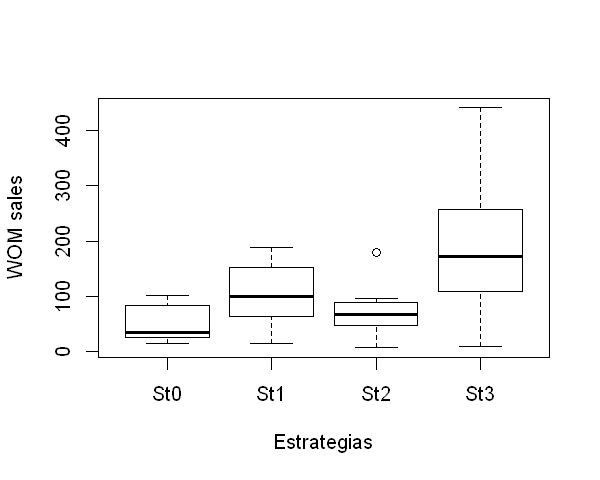

In [22]:
boxplot(WOM_sales_all, xlab="Estrategias", ylab="WOM sales")

In [52]:
setEPS()
postscript("Estrategias_Vs_WoM.eps")
boxplot(WOM_sales_all, xlab="Estrategias", ylab="WOM sales")
dev.off()

pdf 
  2

# Estadística Inferencial

## Prueba de Normalidad

Para determinar si los datos siguen una distribución normal, se aplicó la prueba de Shapiro-Wilk (muestras pequeñas)

In [35]:
shapiro.test(St0_WOM_sales_sum_df$"15%")
shapiro.test(St1_WOM_sales_sum_df$"15%")
shapiro.test(St2_WOM_sales_sum_df$"15%")
shapiro.test(St3_WOM_sales_sum_df$"15%")


	Shapiro-Wilk normality test

data:  St0_WOM_sales_sum_df$"15%"
W = 0.84531, p-value = 0.05108



	Shapiro-Wilk normality test

data:  St1_WOM_sales_sum_df$"15%"
W = 0.97446, p-value = 0.9288



	Shapiro-Wilk normality test

data:  St2_WOM_sales_sum_df$"15%"
W = 0.8954, p-value = 0.1949



	Shapiro-Wilk normality test

data:  St3_WOM_sales_sum_df$"15%"
W = 0.96508, p-value = 0.8418


## Comparación de Medianas - Kruskal Wallis

Se realizó la comparación de medianas entre las diferentes estrategias, aplicando la prueba de Kruskal-Wallis (Datos no paramétricos). Los resultados muestran que, con un p-valor menor a 0.001, se puede afirmar que hay diferencias significativas entre los grupos.

In [48]:
WOM_sales_St0 <- data.frame(St0_WOM_sales_sum_df$"15%" , colnames = "St0") 
colnames(WOM_sales_St0) <- c("WOM_sales", "nrpromoters")

WOM_sales_St1 <- data.frame(St1_WOM_sales_sum_df$"15%" , colnames = "St1") 
colnames(WOM_sales_St1) <- c("WOM_sales", "nrpromoters")

WOM_sales_St2 <- data.frame(St2_WOM_sales_sum_df$"15%" , colnames = "St2") 
colnames(WOM_sales_St2) <- c("WOM_sales", "nrpromoters")

WOM_sales_St3 <- data.frame(St3_WOM_sales_sum_df$"15%" , colnames = "St3") 
colnames(WOM_sales_St3) <- c("WOM_sales", "nrpromoters")

WOM_sales_all_Sts <- Reduce(function(x, y) merge(x, y, all = TRUE), 
    list(WOM_sales_St0, WOM_sales_St1, WOM_sales_St2, WOM_sales_St3))

In [49]:
kruskal.test(WOM_sales~nrpromoters, data = WOM_sales_all_Sts)


	Kruskal-Wallis rank sum test

data:  WOM_sales by nrpromoters
Kruskal-Wallis chi-squared = 14.738, df = 3, p-value = 0.002055


## Comparaciones Múltiples en Modelos no Paramétricos

In [38]:
kruskalmc(WOM_sales~nrpromoters, data = WOM_sales_all_Sts)

ERROR: Error in vapply(seq_along(mapped), function(i) {: Los valores deben ser de longitud 1, 
pero el resultado FUN(X [[3]]) es la longitud 0 


,obs.dif,critical.dif,difference
St0-St1,11.40000,13.79315,0.00000
St0-St2,4.90000,13.79315,0.00000
St0-St3,18.90000,13.79315,1.00000
St1-St2,6.50000,13.79315,0.00000
St1-St3,7.50000,13.79315,0.00000
St2-St3,14.00000,13.79315,1.00000


# Test

ANOVA

In [41]:
anova <- aov(WOM_sales~nrpromoters, data = WOM_sales_all_Sts)

In [43]:
summary(anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
nrpromoters  3 120051   40017   7.444 0.000531 ***
Residuals   36 193529    5376                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [49]:
summary(anova)[[1]][["Pr(>F)"]]

[1] 0.0005309485           NA

In [50]:
TukeyHSD(anova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = WOM_sales ~ nrpromoters, data = WOM_sales_all_Sts)

$nrpromoters
         diff         lwr    upr     p adj
St1-St0  59.0  -29.309997 147.31 0.2902777
St2-St0  24.7  -63.609997 113.01 0.8746604
St3-St0 144.8   56.490003 233.11 0.0004918
St2-St1 -34.3 -122.609997  54.01 0.7237895
St3-St1  85.8   -2.509997 174.11 0.0594800
St3-St2 120.1   31.790003 208.41 0.0042399


LEVENE

In [41]:
library("Rcmdr", lib.loc="~/R/R-3.3.1/library")

ERROR: Error: This is R 3.1.3, package 'Rcmdr' needs >= 3.2.0


In [43]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          1.3                         
year           2015                        
month          03                          
day            09                          
svn rev        67962                       
language       R                           
version.string R version 3.1.3 (2015-03-09)
nickname       Smooth Sidewalk             

In [36]:
library("Rcmdr", lib.loc="~/R/win-library/3.2")

ERROR: Error in library("Rcmdr", lib.loc = "~/R/win-library/3.2"): there is no package called 'Rcmdr'


In [38]:
library("Rcmdr", lib.loc="~/R/R-3.2.0/library")

ERROR: Error in library("Rcmdr", lib.loc = "~/R/R-3.2.0/library"): no library trees found in 'lib.loc'


In [34]:
levene.test(WOM_sales~nrpromoters, data = WOM_sales_all_Sts)

ERROR: Error in eval(expr, envir, enclos): no se pudo encontrar la función "levene.test"


In [45]:
write.csv(WOM_sales_all_Sts, "WOM_sales.csv")

ERROR: Error in is.data.frame(x): objeto 'WOM_sales_all_Sts' no encontrado


In [52]:
write.csv(WOM_sales_all_Sts, "WOM_sales_all_Sts.csv")